<a href="https://colab.research.google.com/github/kganeshv12/M_test_1/blob/master/CarVsLorry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MASTER!!!

In [2]:
!pip install -Uqq fastai duckduckgo_search

Step 1 : Downloading images of cars and lorries

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images = 50):
  print("searching for : ", term)
  return L(ddg_images(term, max_results = max_images)).itemgot('image')

In [4]:
t = L(range(12))
print(t)
# the capital letter L is in fastai and acts as a list.
# not abe to figure out what L.itemlog does?
# foundation fastai


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [5]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
urls = search_images('sports car images', max_images = 1)
urls[0]

searching for :  sports car images


'https://digitalsynopsis.com/wp-content/uploads/2014/06/supercar-wallpapers-bugatti-3.jpg'

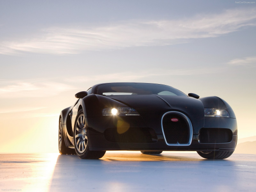

In [6]:
from fastdownload import download_url
dest1 = 'car.jpg'
download_url(urls[0], dest1, show_progress= False)

from fastai.vision.all import *
im = Image.open(dest1)
im.to_thumb(256,256)


searching for :  lorry images


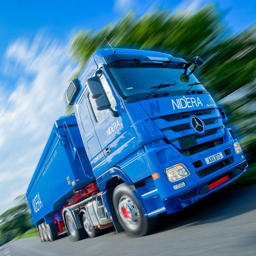

In [7]:
dest2 = 'lorry.jpg'
urls1 = search_images('lorry images', max_images = 1)
urls1[0]
download_url(urls1[0], dest2, show_progress= False)

im1 = Image.open(dest2)
im1.to_thumb(256,256)

In [8]:
searches = 'lorry','car'
path = Path('car_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

searching for :  lorry photo
searching for :  lorry sun photo
searching for :  lorry shade photo
searching for :  car photo
searching for :  car sun photo
searching for :  car shade photo


STEP 2: TRAIN THE MODEL

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

9

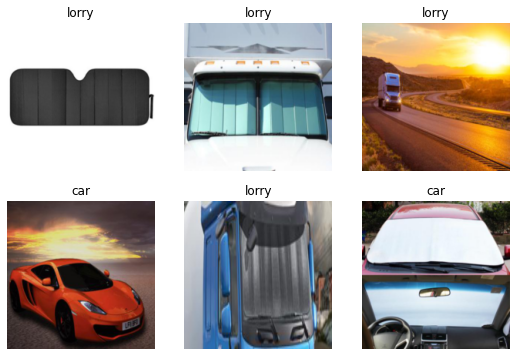

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=200)

dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.476323,1.371798,0.600000,00:35


epoch,train_loss,valid_loss,error_rate,time
0,1.457801,0.946119,0.509091,00:49
1,1.206208,0.542471,0.145455,00:48
2,0.908099,0.492610,0.145455,00:49


STEP 3 : TEST THE MODEL


In [19]:
# from fastai.vision.all import *
# !pip install -Uqq fastbook
# import fastbook
# # fastbook.setup_book()
# uploader = widgets.FileUpload()
# uploader

In [20]:
is_car,_,probs = learn.predict(PILImage.create("car.jpg"))
print(f"This is a: {is_car}.")
print(f"Probability it's a car: {probs[0]:.4f}")

This is a: car.
Probability it's a car: 0.9917
